## Prediction of buying product

Problem Statement


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

In [292]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [293]:
#Reading training, test and sample submission data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample.csv')

In [294]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [295]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [296]:
#Convertion of date columns from object to datetime.
train.created_at=pd.to_datetime(train.created_at)
train.signup_date=pd.to_datetime(train.signup_date)

In [297]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  int64         
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   products_purchased    18250 non-null  float64       
 5   signup_date           24048 non-null  datetime64[ns]
 6   user_activity_var_1   39161 non-null  int64         
 7   user_activity_var_2   39161 non-null  int64         
 8   user_activity_var_3   39161 non-null  int64         
 9   user_activity_var_4   39161 non-null  int64         
 10  user_activity_var_5   39161 non-null  int64         
 11  user_activity_var_6   39161 non-null  int64         
 12  user_activity_var_7   39161 non-null  int64         
 13  user_activity_va

In [298]:
train.describe(percentiles=(0.01,0.1,0.25,0.50,0.75,0.9,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
id,39161.0,19581.000000,11304.951283,1.0,392.6,3917.0,9791.0,19581.0,29371.0,35245.0,38769.4,39161.0
campaign_var_1,39161.0,6.523812,3.472944,1.0,1.0,2.0,4.0,6.0,9.0,11.0,15.0,16.0
campaign_var_2,39161.0,6.452746,2.614296,1.0,1.0,3.0,5.0,6.0,8.0,10.0,13.0,15.0
products_purchased,18250.0,2.154137,0.779815,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0
user_activity_var_1,39161.0,0.400092,0.509194,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0
user_activity_var_2,39161.0,0.006716,0.081676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,0.102832,0.303743,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
user_activity_var_4,39161.0,0.011465,0.106463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
user_activity_var_5,39161.0,0.151503,0.359681,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
user_activity_var_6,39161.0,0.499834,0.558166,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0


In [19]:
#%NaN values in every features.
pd.DataFrame({'NaN':train.isna().sum(),'%':round(train.isna().sum()/train.shape[0]*100,2)})

,NaN,%
id,0,0.00
created_at,0,0.00
campaign_var_1,0,0.00
campaign_var_2,0,0.00
products_purchased,20911,53.40
signup_date,15113,38.59
user_activity_var_1,0,0.00
user_activity_var_2,0,0.00
user_activity_var_3,0,0.00
user_activity_var_4,0,0.00


In [299]:
#Value counts of product purchased by customer.
train.products_purchased.value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

- Assuming NaN values in product purchase is due to customer visited buy did noy buy any products.
- So replacing Nan value with 0.

In [301]:
train['products_purchased']=train['products_purchased'].fillna(0)

- Replacing signup_date NaN values with created_at date

In [303]:
train['signup_date']=train['created_at']

In [304]:
#%NaN values in every features.
pd.DataFrame({'NaN':train.isna().sum(),'%':round(train.isna().sum()/train.shape[0]*100,2)})

,NaN,%
id,0,0.0
created_at,0,0.0
campaign_var_1,0,0.0
campaign_var_2,0,0.0
products_purchased,0,0.0
signup_date,0,0.0
user_activity_var_1,0,0.0
user_activity_var_2,0,0.0
user_activity_var_3,0,0.0
user_activity_var_4,0,0.0


In [336]:
#Defining dependent and independent features.
y=train.buy
X_dates=train[['created_at','signup_date']]
X=train.drop(['id','buy','created_at','signup_date'],axis=1)

In [307]:
X.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')

In [308]:
X.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0


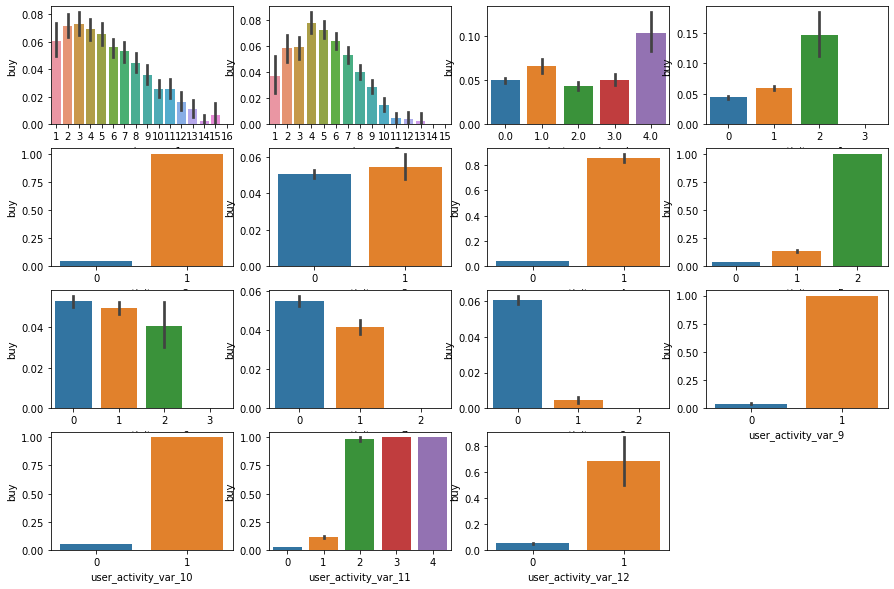

In [309]:
#Bi-variate analysis of independent variables
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(4,4,i)
    sns.barplot(X[col],y)

In [318]:
#Date features
X_dates.head()

,signup_date,c_day,c_month,c_week,c_weekday,c_Isweekend
0,2021-01-01,1,1,53,4,0
1,2021-01-01,1,1,53,4,0
2,2021-01-01,1,1,53,4,0
3,2021-01-01,1,1,53,4,0
4,2021-01-01,1,1,53,4,0


In [337]:
#Feature extraction function
def feature_date(df,feature,prefix):
    df[prefix+'_'+'day']=df[feature].dt.day
    df[prefix+'_'+'month']=df[feature].dt.month
    df[prefix+'_'+'week']=df[feature].dt.week
    df[prefix+'_'+'weekday']=df[feature].dt.weekday
    df[prefix+'_'+'Isweekend']=np.where(df[feature].dt.weekday>=5,1,0)
    return df

In [338]:
df_date1=feature_date(X_dates,'created_at','c')
df_date2=feature_date(X_dates,'signup_date','s')

In [342]:
df_date2.head()

,created_at,signup_date,c_day,c_month,c_week,c_weekday,c_Isweekend,s_day,s_month,s_week,s_weekday,s_Isweekend
0,2021-01-01,2021-01-01,1,1,53,4,0,1,1,53,4,0
1,2021-01-01,2021-01-01,1,1,53,4,0,1,1,53,4,0
2,2021-01-01,2021-01-01,1,1,53,4,0,1,1,53,4,0
3,2021-01-01,2021-01-01,1,1,53,4,0,1,1,53,4,0
4,2021-01-01,2021-01-01,1,1,53,4,0,1,1,53,4,0


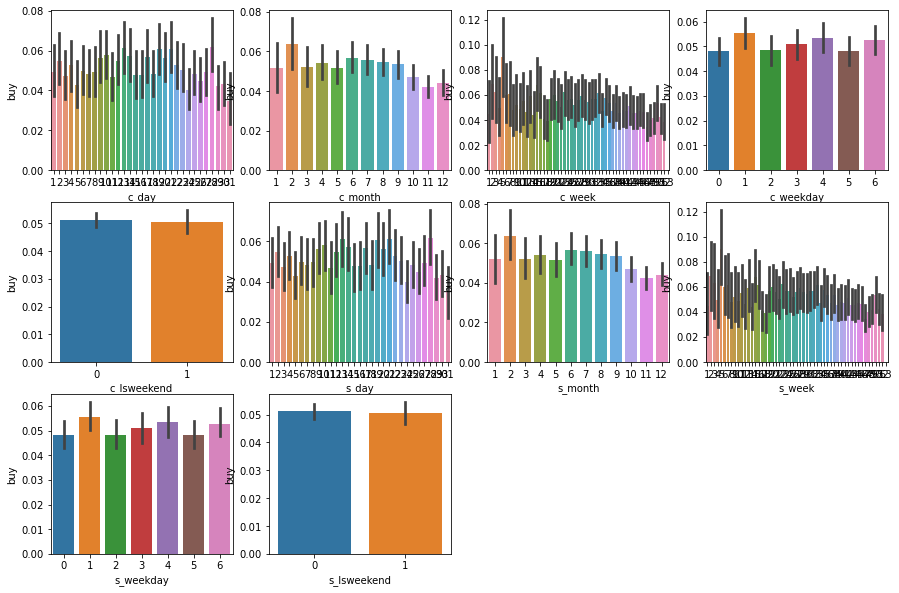

In [346]:
#Bi-variate analysis of features extracted from dates
plt.figure(figsize=(15,10))
for i,col in enumerate(df_date2.columns[2:],1):
    plt.subplot(3,4,i)
    sns.barplot(df_date2[col],y)

In [339]:
X_fin=pd.concat([X,df_date2],axis=1)
X_fin.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,c_day,c_month,c_week,c_weekday,c_Isweekend,s_day,s_month,s_week,s_weekday,s_Isweekend
0,1,2,2.0,0,0,0,0,0,0,1,...,1,1,53,4,0,1,1,53,4,0
1,2,1,2.0,1,0,1,0,0,0,1,...,1,1,53,4,0,1,1,53,4,0
2,9,3,3.0,1,0,0,0,0,0,0,...,1,1,53,4,0,1,1,53,4,0
3,6,7,2.0,0,0,0,0,0,0,0,...,1,1,53,4,0,1,1,53,4,0
4,4,6,0.0,0,0,0,0,0,0,1,...,1,1,53,4,0,1,1,53,4,0


In [347]:
X_fin.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'created_at', 'signup_date', 'c_day', 'c_month', 'c_week', 'c_weekday',
       'c_Isweekend', 's_day', 's_month', 's_week', 's_weekday',
       's_Isweekend'],
      dtype='object')

In [348]:
#Dependent features value counts
y.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [350]:
#Dropping date features.
X_fin=X_fin.drop(['created_at', 'signup_date'],axis=1)
X_fin.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,c_day,c_month,c_week,c_weekday,c_Isweekend,s_day,s_month,s_week,s_weekday,s_Isweekend
0,1,2,2.0,0,0,0,0,0,0,1,...,1,1,53,4,0,1,1,53,4,0
1,2,1,2.0,1,0,1,0,0,0,1,...,1,1,53,4,0,1,1,53,4,0
2,9,3,3.0,1,0,0,0,0,0,0,...,1,1,53,4,0,1,1,53,4,0
3,6,7,2.0,0,0,0,0,0,0,0,...,1,1,53,4,0,1,1,53,4,0
4,4,6,0.0,0,0,0,0,0,0,1,...,1,1,53,4,0,1,1,53,4,0


In [351]:
#Splitting test and train dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.2,random_state=4)

In [352]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (31328, 25)
Shape of Testing Data (7833, 25)
Response Rate in Training Data 0.05065755873340143
Response Rate in Testing Data 0.052470317885867486


In [353]:
y_train.value_counts()

0    29741
1     1587
Name: buy, dtype: int64

In [354]:
#Result printing function
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def results(clf,X_train,y_train,X_test,y_test):
    print('========================================================================')
    print('Train data result summary')
    print('========================================================================')
    y_pred=clf.predict(X_train)
    score=accuracy_score(y_train,y_pred)
    c_matrix=confusion_matrix(y_train,y_pred)
    c_report=classification_report(y_train,y_pred,output_dict=True)
    print('Accuracy score : ')
    print(str(score)+'\n')
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))
    
    print('\n========================================================================')
    print('Test data result summary')
    print('========================================================================')
    y_pred1=clf.predict(X_test)
    score=accuracy_score(y_test,y_pred1)
    c_matrix=confusion_matrix(y_test,y_pred1)
    c_report=classification_report(y_test,y_pred1,output_dict=True)
    print('Accuracy score : ')
    print(str(score)+'\n')
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))

In [355]:
# Model Building - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(n_estimators=500,criterion='gini', max_depth=100, min_samples_leaf=10)
RF_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=10, n_estimators=500)

In [356]:
#Result
results(RF_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.9749744637385087

Confusion matrix : 


,0,1
0,29701,40
1,744,843


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.975562,0.954700,0.974974,0.965131,0.974506
recall,0.998655,0.531191,0.974974,0.764923,0.974974
f1-score,0.986974,0.682591,0.974974,0.834782,0.971554
support,29741.000000,1587.000000,0.974974,31328.000000,31328.000000



Test data result summary
Accuracy score : 
0.9733180135324907

Confusion matrix : 


,0,1
0,7412,10
1,199,212


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.973854,0.954955,0.973318,0.964404,0.972862
recall,0.998653,0.515815,0.973318,0.757234,0.973318
f1-score,0.986097,0.669826,0.973318,0.827962,0.969502
support,7422.000000,411.000000,0.973318,7833.000000,7833.000000


In [357]:
# Model Building - CatBoostClassifier
from catboost import CatBoostClassifier
CB_clf=CatBoostClassifier(iterations=500,
                          learning_rate=0.05,
                          depth=2)
CB_clf.fit(X_train,y_train)

0:	learn: 0.6218054	total: 921ms	remaining: 7m 39s
1:	learn: 0.5601694	total: 948ms	remaining: 3m 56s
2:	learn: 0.5033024	total: 990ms	remaining: 2m 43s
3:	learn: 0.4551910	total: 1.04s	remaining: 2m 8s
4:	learn: 0.4135170	total: 1.05s	remaining: 1m 44s
5:	learn: 0.3801974	total: 1.07s	remaining: 1m 27s
6:	learn: 0.3479472	total: 1.08s	remaining: 1m 16s
7:	learn: 0.3208303	total: 1.1s	remaining: 1m 7s
8:	learn: 0.2974869	total: 1.24s	remaining: 1m 7s
9:	learn: 0.2773201	total: 1.28s	remaining: 1m 2s
10:	learn: 0.2571247	total: 1.37s	remaining: 1m
11:	learn: 0.2407907	total: 1.38s	remaining: 56.1s
12:	learn: 0.2269788	total: 1.4s	remaining: 52.3s
13:	learn: 0.2152734	total: 1.42s	remaining: 49.2s
14:	learn: 0.2047557	total: 1.43s	remaining: 46.4s
15:	learn: 0.1952798	total: 1.45s	remaining: 43.8s
16:	learn: 0.1867787	total: 1.46s	remaining: 41.5s
17:	learn: 0.1794513	total: 1.48s	remaining: 39.5s
18:	learn: 0.1728998	total: 1.49s	remaining: 37.7s
19:	learn: 0.1671718	total: 1.5s	remaini

169:	learn: 0.0969583	total: 4.32s	remaining: 8.39s
170:	learn: 0.0969277	total: 4.34s	remaining: 8.34s
171:	learn: 0.0969026	total: 4.35s	remaining: 8.3s
172:	learn: 0.0968556	total: 4.37s	remaining: 8.25s
173:	learn: 0.0968363	total: 4.38s	remaining: 8.21s
174:	learn: 0.0967894	total: 4.4s	remaining: 8.16s
175:	learn: 0.0967231	total: 4.41s	remaining: 8.11s
176:	learn: 0.0966977	total: 4.42s	remaining: 8.07s
177:	learn: 0.0966618	total: 4.44s	remaining: 8.04s
178:	learn: 0.0966477	total: 4.46s	remaining: 8.01s
179:	learn: 0.0965610	total: 4.49s	remaining: 7.98s
180:	learn: 0.0965152	total: 4.52s	remaining: 7.96s
181:	learn: 0.0964921	total: 4.54s	remaining: 7.93s
182:	learn: 0.0964748	total: 4.56s	remaining: 7.9s
183:	learn: 0.0964428	total: 4.57s	remaining: 7.86s
184:	learn: 0.0963885	total: 4.59s	remaining: 7.81s
185:	learn: 0.0963648	total: 4.6s	remaining: 7.77s
186:	learn: 0.0963095	total: 4.62s	remaining: 7.72s
187:	learn: 0.0963011	total: 4.63s	remaining: 7.68s
188:	learn: 0.09

331:	learn: 0.0931516	total: 6.67s	remaining: 3.38s
332:	learn: 0.0931337	total: 6.68s	remaining: 3.35s
333:	learn: 0.0931270	total: 6.7s	remaining: 3.33s
334:	learn: 0.0931223	total: 6.71s	remaining: 3.3s
335:	learn: 0.0931127	total: 6.73s	remaining: 3.28s
336:	learn: 0.0931098	total: 6.74s	remaining: 3.26s
337:	learn: 0.0930875	total: 6.75s	remaining: 3.23s
338:	learn: 0.0930816	total: 6.76s	remaining: 3.21s
339:	learn: 0.0930591	total: 6.79s	remaining: 3.19s
340:	learn: 0.0930447	total: 6.8s	remaining: 3.17s
341:	learn: 0.0930279	total: 6.81s	remaining: 3.15s
342:	learn: 0.0930252	total: 6.83s	remaining: 3.12s
343:	learn: 0.0930093	total: 6.84s	remaining: 3.1s
344:	learn: 0.0929966	total: 6.86s	remaining: 3.08s
345:	learn: 0.0929887	total: 6.88s	remaining: 3.06s
346:	learn: 0.0929599	total: 6.89s	remaining: 3.04s
347:	learn: 0.0929514	total: 6.91s	remaining: 3.02s
348:	learn: 0.0929480	total: 6.92s	remaining: 2.99s
349:	learn: 0.0929328	total: 6.94s	remaining: 2.97s
350:	learn: 0.09

495:	learn: 0.0912208	total: 8.97s	remaining: 72.4ms
496:	learn: 0.0912162	total: 8.99s	remaining: 54.3ms
497:	learn: 0.0911995	total: 9.01s	remaining: 36.2ms
498:	learn: 0.0911856	total: 9.02s	remaining: 18.1ms
499:	learn: 0.0911815	total: 9.03s	remaining: 0us


In [358]:
#Result
results(CB_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.9756128702757916

Confusion matrix : 


,0,1
0,29704,37
1,727,860


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.976110,0.958751,0.975613,0.967431,0.975231
recall,0.998756,0.541903,0.975613,0.770329,0.975613
f1-score,0.987303,0.692432,0.975613,0.839867,0.972366
support,29741.000000,1587.000000,0.975613,31328.000000,31328.000000



Test data result summary
Accuracy score : 
0.9742116685816418

Confusion matrix : 


,0,1
0,7412,10
1,192,219


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.974750,0.956332,0.974212,0.965541,0.973784
recall,0.998653,0.532847,0.974212,0.765750,0.974212
f1-score,0.986557,0.684375,0.974212,0.835466,0.970701
support,7422.000000,411.000000,0.974212,7833.000000,7833.000000


In [359]:
# Model Building - xgboost
import xgboost as xgb
xg_clf = xgb.XGBClassifier(subsample=0.5,colsample_bytree = 0.7, learning_rate = 0.05,
                max_depth = 10, alpha = 10, n_estimators = 500)
xg_clf.fit(X_train,y_train)

[23:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [360]:
#Result
results(xg_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.975485188968335

Confusion matrix : 


,0,1
0,29690,51
1,717,870


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.976420,0.944625,0.975485,0.960523,0.974809
recall,0.998285,0.548204,0.975485,0.773245,0.975485
f1-score,0.987231,0.693780,0.975485,0.840506,0.972366
support,29741.000000,1587.000000,0.975485,31328.000000,31328.000000



Test data result summary
Accuracy score : 
0.9740840035746202

Confusion matrix : 


,0,1
0,7412,10
1,193,218


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.974622,0.956140,0.974084,0.965381,0.973652
recall,0.998653,0.530414,0.974084,0.764533,0.974084
f1-score,0.986491,0.682316,0.974084,0.834404,0.970531
support,7422.000000,411.000000,0.974084,7833.000000,7833.000000


### Prediction for Test data set provided.

In [361]:
#%NaN values in every features.
pd.DataFrame({'NaN':test.isna().sum(),'%':round(test.isna().sum()/test.shape[0]*100,2)})

,NaN,%
id,0,0.00
created_at,0,0.00
campaign_var_1,0,0.00
campaign_var_2,0,0.00
products_purchased,8136,61.71
signup_date,6649,50.43
user_activity_var_1,0,0.00
user_activity_var_2,0,0.00
user_activity_var_3,0,0.00
user_activity_var_4,0,0.00


In [362]:
#Imputatipons for Test data
test['products_purchased']=test['products_purchased'].fillna(0)
test['signup_date']=test['created_at']

In [363]:
#Seperating date features
X_dates_t=test[['signup_date','created_at']]
X_t=test.drop(['id','signup_date','created_at'],axis=1)

In [364]:
#Converting date features to datetime
X_dates_t['created_at']=pd.to_datetime(test['created_at'])
X_dates_t['signup_date']=pd.to_datetime(test['signup_date'])

In [365]:
#Using Feature extracting function for feature engineering
df_date1_t=feature_date(X_dates_t,'created_at','c')
df_date2_t=feature_date(X_dates_t,'signup_date','s')

In [366]:
#Concatinating all features as independent features.
X_fin_t=pd.concat([X_t,df_date2_t],axis=1)
X_fin_t.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,c_day,c_month,c_week,c_weekday,c_Isweekend,s_day,s_month,s_week,s_weekday,s_Isweekend
0,2,2,0.0,1,1,0,0,0,1,0,...,1,1,52,5,1,1,1,52,5,1
1,4,7,3.0,1,0,0,0,0,0,0,...,1,1,52,5,1,1,1,52,5,1
2,8,7,0.0,0,0,0,0,1,1,0,...,1,1,52,5,1,1,1,52,5,1
3,9,8,2.0,0,0,0,0,1,1,1,...,1,1,52,5,1,1,1,52,5,1
4,4,5,2.0,1,0,0,0,0,0,0,...,1,1,52,5,1,1,1,52,5,1


In [368]:
#Dropping date features.
X_fin_t=X_fin_t.drop(['created_at', 'signup_date'],axis=1)
X_fin_t.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,c_day,c_month,c_week,c_weekday,c_Isweekend,s_day,s_month,s_week,s_weekday,s_Isweekend
0,2,2,0.0,1,1,0,0,0,1,0,...,1,1,52,5,1,1,1,52,5,1
1,4,7,3.0,1,0,0,0,0,0,0,...,1,1,52,5,1,1,1,52,5,1
2,8,7,0.0,0,0,0,0,1,1,0,...,1,1,52,5,1,1,1,52,5,1
3,9,8,2.0,0,0,0,0,1,1,1,...,1,1,52,5,1,1,1,52,5,1
4,4,5,2.0,1,0,0,0,0,0,0,...,1,1,52,5,1,1,1,52,5,1


In [369]:
#Predicting for test data
pred=xg_clf.predict(X_fin_t)

In [370]:
#Updating classes in sample dataframe
sample['buy']=pred

In [371]:
#Writing to an excel
sample.to_csv('Final_Predictions.csv',index=False)